In [1]:
# This file is in scripts/load.py
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from scipy import io
import random
import matplotlib.pyplot as plt
from save_csv import *

In [2]:
for data_name in ["mnist", "spam", "cifar10"]:
    data = np.load(f"/Users/nataliekemper/Downloads/Berkeley/SPRING2023/CS189/Homework/hw1/data/{data_name}-data.npz")
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)


loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 32)
training_data (4172, 32)
training_labels (4172,)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000,)


### QUESTION 2:

In [3]:
def shuffle_data(array1, array2, num):
    merged_list = list(zip(array1, array2))
    
    shuffled = random.sample(merged_list, len(merged_list))
    
    unfiltered_training, unfiltered_val = shuffled[num:], shuffled[:num]
    
    X_training_data, y_training_labels = zip(*unfiltered_training)
    X_validation_data, y_validation_labels = zip(*unfiltered_val)
    
    return np.asarray(X_training_data), np.asarray(y_training_labels), np.asarray(X_validation_data), np.asarray(y_validation_labels)



In [4]:
# Partitioning MNIST data
mnist_data = np.load(f"../data/mnist-data.npz")

trainingList = mnist_data['training_data']
labelList = mnist_data['training_labels']

trainingList.resize(60000, 784)

X_mnistTraining_data, y_mnistTraining_labels, X_mnistValidation_data, y_mnistValidation_labels = shuffle_data(
    trainingList, labelList, 10000)

In [5]:
# Partitioning SPAM data
spam_data = np.load(f"../data/spam-data.npz")
    
trainingList = spam_data['training_data']
labelList = spam_data['training_labels']

# 834 is roughly 20% of the data
num = 834
X_spamTraining_data, y_spamTraining_labels, X_spamValidation_data, y_spamValidation_labels = shuffle_data(
    trainingList, labelList, num)

In [6]:
# Partitioning Cifar10 data
cifar_data = np.load(f"../data/cifar10-data.npz")
    
trainingList = cifar_data['training_data']
labelList = cifar_data['training_labels']

num = 5000
X_cifarTraining_data, y_cifarTraining_labels, X_cifarValidation_data, y_cifarValidation_labels = shuffle_data(
    trainingList, labelList, num)

### QUESTION 3:

In [7]:
sets = [100, 200, 500, 1000, 2000, 5000, 10000]
train_acc = []
val_acc = []

In [8]:
for num in sets:
    mnist_model = svm.SVC(kernel = "linear")
    mnist_model.fit(X_mnistTraining_data[:num, :], y_mnistTraining_labels[:num])

    x_pred = mnist_model.predict(X_mnistTraining_data[:num, :])
    y_pred = mnist_model.predict(X_mnistValidation_data[:num, :])

    v_acc, t_acc = accuracy_score(y_mnistValidation_labels[:num], y_pred), accuracy_score(y_mnistTraining_labels[:num], x_pred)
    
    train_acc.append(t_acc)
    val_acc.append(v_acc)
    

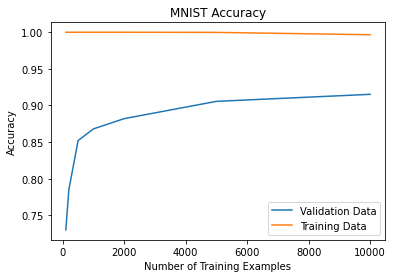

In [9]:
plt.plot(sets, val_acc, label='Validation Data')
plt.plot(sets, train_acc, label='Training Data')
plt.title('MNIST Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
spamsets = [100, 200, 500, 1000, 2000, 4173]
spamtrain_acc = []
spamval_acc = []

In [11]:
for num in spamsets:
    spam_model = svm.SVC(kernel = "linear")
    spam_model.fit(X_spamTraining_data[:num, :], y_spamTraining_labels[:num])

    x_pred = spam_model.predict(X_spamTraining_data[:num, :])
    y_pred = spam_model.predict(X_spamValidation_data[:num, :])

    v_acc, t_acc = accuracy_score(y_spamValidation_labels[:num], y_pred), accuracy_score(y_spamTraining_labels[:num], x_pred)
    
    spamtrain_acc.append(t_acc)
    spamval_acc.append(v_acc)
    

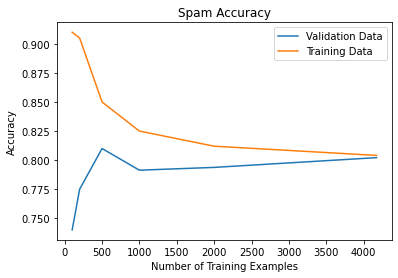

In [12]:
plt.plot(spamsets, spamval_acc, label = "Validation Data")
plt.plot(spamsets, spamtrain_acc, label = "Training Data")
plt.title('Spam Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
cisets = [100, 200, 500, 1000, 2000, 5000]
citrain_acc = []
cival_acc = []

In [14]:
for num in cisets:
    ci_model = svm.SVC(kernel = "linear")
    ci_model.fit(X_cifarTraining_data[:num, :], y_cifarTraining_labels[:num])

    x_pred = ci_model.predict(X_cifarTraining_data[:num, :])
    y_pred = ci_model.predict(X_cifarValidation_data[:num, :])

    v_acc, t_acc = accuracy_score(y_cifarValidation_labels[:num], y_pred), accuracy_score(y_cifarTraining_labels[:num], x_pred)
    
    citrain_acc.append(t_acc)
    cival_acc.append(v_acc)
    

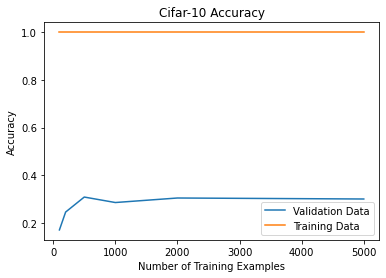

In [15]:
plt.plot(cisets, cival_acc, label = "Validation Data")
plt.plot(cisets, citrain_acc, label = "Training Data")
plt.title('Cifar-10 Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### QUESTION 4:

In [16]:
a = 1
r = 10
length = 6

geometric = [a * r ** (n - 1) for n in range(1, length + 1)]
l = [0.00001, 0.0001, 0.001, 0.01, 0.1]

c_list = l + geometric
c_list

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

In [17]:
num = 10000
validation_acc = []
training_acc = []

for c in c_list:
    model = svm.SVC(C=c, kernel = "linear")
    model.fit(X_mnistTraining_data[:num, :], y_mnistTraining_labels[:num])
    
    x_pred = model.predict(X_mnistTraining_data[:num, :])
    y_pred = model.predict(X_mnistValidation_data[:num, :])

    validation_acc, training_acc = accuracy_score(
        y_mnistValidation_labels[:num], y_pred), accuracy_score(y_mnistTraining_labels[:num], x_pred)
    
    print("c: " + str(c) + ", validation accuracy: " + str(validation_acc))

c: 1e-05, validation accuracy: 0.1131
c: 0.0001, validation accuracy: 0.7632
c: 0.001, validation accuracy: 0.8978
c: 0.01, validation accuracy: 0.9262
c: 0.1, validation accuracy: 0.9308
c: 1, validation accuracy: 0.9152
c: 10, validation accuracy: 0.9095
c: 100, validation accuracy: 0.9095
c: 1000, validation accuracy: 0.9095
c: 10000, validation accuracy: 0.9095
c: 100000, validation accuracy: 0.9095


In [18]:
num = 10000
validation_acc = []
training_acc = []

for c in c_list:
    model = svm.SVC(C=c, kernel = "rbf")
    model.fit(X_mnistTraining_data[:num, :], y_mnistTraining_labels[:num])
    
    x_pred = model.predict(X_mnistTraining_data[:num, :])
    y_pred = model.predict(X_mnistValidation_data[:num, :])

    validation_acc, training_acc = accuracy_score(
        y_mnistValidation_labels[:num], y_pred), accuracy_score(y_mnistTraining_labels[:num], x_pred)
    
    print("c: " + str(c) + ", validation accuracy: " + str(validation_acc))

c: 1e-05, validation accuracy: 0.1131
c: 0.0001, validation accuracy: 0.1131
c: 0.001, validation accuracy: 0.1131
c: 0.01, validation accuracy: 0.7663
c: 0.1, validation accuracy: 0.9282
c: 1, validation accuracy: 0.9604
c: 10, validation accuracy: 0.9677
c: 100, validation accuracy: 0.9677
c: 1000, validation accuracy: 0.9677
c: 10000, validation accuracy: 0.9677
c: 100000, validation accuracy: 0.9677


Printed above are the c-values I tested, along with their corresponding validation accuracies. I trained using a linear kernel, and found 0.1 to be the best c value for the validation set with a score of 93.08%. I also tested separately using a rbf kernel and found an even better set of hyperparameters: c = 10 with a validation score of 96.77%. The code can all be found in the code index. 

### Question 5: K-Fold Cross Validation

In [7]:
k = 5
cross_val_acc = []

In [8]:
spam_train = spam_data['training_data']
spam_label = spam_data['training_labels']

merged = list(zip(spam_train, spam_label))
shuffled = random.sample(merged, len(merged))

In [9]:
# Splitting the data into 5-folds

fold1 = shuffled[0:833]                                            
fold2 = shuffled[834:1668]
fold3 = shuffled[1669:2503]
fold4 = shuffled[2504:3338]
fold5 = shuffled[3339:4172]

In [10]:
train_1 = fold1 + fold2 + fold3 + fold4
test_1 = fold5

train_2 = fold1 + fold2 + fold3 + fold5
test_2 = fold4

train_3 = fold1 + fold2 + fold4 + fold5
test_3 = fold3

train_4 = fold1 + fold3 + fold4 + fold5
test_4 = fold2

train_5 = fold2 + fold3 + fold4 + fold5
test_5 = fold1

folds = [[train_1, test_1], [train_2, test_2], [train_3, test_3], [train_4, test_4], [train_5, test_5]]

In [11]:
c_list_mod = [0.0001, 0.001, 0.01, 0.1, 0.25, 1, 10, 100]

for c in c_list_mod:
    validation = []
    for fold in folds:
        training, testing = fold[0], fold[1]
        train, train_label = zip(*training)
        test, test_label = zip(*testing)

        model = svm.SVC(C=c, kernel = "linear")
        model.fit(train, train_label)

        y_pred = model.predict(test)

        validation.append(accuracy_score(test_label, y_pred))
        
    avg_val = (sum(validation)) / 5
    print("c: " + str(c) + ", validation accuracy: " + str(avg_val))

c: 0.0001, validation accuracy: 0.7144958702905623
c: 0.001, validation accuracy: 0.7471259007200002
c: 0.01, validation accuracy: 0.7790365066890066
c: 0.1, validation accuracy: 0.794869890402204
c: 0.25, validation accuracy: 0.7987091239373447
c: 1, validation accuracy: 0.8001479728582079
c: 10, validation accuracy: 0.8023071098943173
c: 100, validation accuracy: 0.8023065341244411


Best C value for 5-fold cross validation: 100

Validation Score: 80.23%

### Question 6: Kaggle

In [12]:
# MNIST data

c = 10
kernel = "rbf"
num = 10000
    
mnist_model = svm.SVC(C=10, kernel = "rbf")
mnist_model.fit(X_mnistTraining_data[:num, :], y_mnistTraining_labels[:num])

y_pred = mnist_model.predict(X_mnistValidation_data[:num, :])

validation_acc = accuracy_score(y_mnistValidation_labels[:num], y_pred)
 
print("c: " + str(c) + ", validation accuracy: " + str(validation_acc))

c: 10, validation accuracy: 0.9698


In [13]:
num = 10000

mnist = np.load(f"../data/mnist-data.npz")
mnist_t = mnist["test_data"]
mnist_test = mnist_t.reshape(10000, 784)

mnist_model = svm.SVC(C=10, kernel = "rbf")
mnist_model.fit(X_mnistTraining_data[:num, :], y_mnistTraining_labels[:num])

mnist_yTest = mnist_model.predict(mnist_test)

results_to_csv(mnist_yTest)

For the MNIST dataset, I played around with different c values and kernels. I found that a combination of an rbf kernel and a corresponding c value of 10 was the most optimal for validation accuracies.

### MNIST Kaggle Score: 0.96766

In [16]:
# Spam/Ham data
# I modified featurized.py to include an additional features

c_spam = 1000
num = 10000
spam_mod = svm.SVC(C=1000, kernel = "rbf")
spam_mod.fit(X_spamTraining_data[:num, :], y_spamTraining_labels[:num])
    
y_pred = spam_mod.predict(X_spamValidation_data[:num, :])

validation_acc = accuracy_score(y_spamValidation_labels[:num], y_pred)
print("c: " + str(c_spam) + ", validation accuracy: " + str(validation_acc))

c: 1000, validation accuracy: 0.815347721822542


In [17]:
num = 10000

spam = np.load(f"../data/spam-data.npz")
spam_test = spam["test_data"]

spam_model = svm.SVC(C=1000, kernel = "rbf")
spam_model.fit(X_spamTraining_data[:num, :], y_spamTraining_labels[:num])

spam_yTest = spam_model.predict(spam_test)

results_to_csv(spam_yTest)

For the spam dataset, I modified featurize.py to include more characters and word counts. For example, I included features such as "/", "subscribe", and "click" to pick up on phrases and characters commonly found in spam emails. In addition, I tested on different kernels and c values, narrowing down the optimal c = 1000 for the rbf kernel.

### SPAM Kaggle Score: 0.8133

In [18]:
# CIFAR-10 data
# I played around with different c values and used a nonlinear model ('poly') to determine the best hyperparameters

a = 1
r = 10
length = 4

geometric = [a * r ** (n - 1) for n in range(1, length + 1)]
l = [0.001, 0.01, 0.1]

c_list = l + geometric

num = 5000
validation_acc = []
training_acc = []

for c in c_list:
    model = svm.SVC(C=c, kernel = "poly")
    model.fit(X_cifarTraining_data[:num, :], y_cifarTraining_labels[:num])
    
    #x_pred = model.predict(X_cifarTraining_data[:num, :])
    y_pred = model.predict(X_cifarValidation_data)

    validation_acc = accuracy_score(y_cifarValidation_labels, y_pred)
    
    print("c: " + str(c) + ", validation accuracy: " + str(validation_acc))

c: 0.001, validation accuracy: 0.2942
c: 0.01, validation accuracy: 0.3776
c: 0.1, validation accuracy: 0.4152
c: 1, validation accuracy: 0.4078
c: 10, validation accuracy: 0.3934
c: 100, validation accuracy: 0.387
c: 1000, validation accuracy: 0.3866


For the cifar-10 dataset, I tested different c values and nonlinear models. Out of the hyperparameters, I found c=0.1 with kernel=poly to be the most optimal combination for the validation data.

In [27]:
num = 5000

cifar = np.load(f"../data/cifar10-data.npz")
cifar_test = cifar["test_data"]

cifar_model = svm.SVC(kernel = 'poly', C = 0.1)
cifar_model.fit(X_cifarTraining_data[:num, :], y_cifarTraining_labels[:num])

cifar_yTest = cifar_model.predict(cifar_test)

results_to_csv(cifar_yTest)

### CIFAR-10 Kaggle Score: 0.419